# Benchmarking Top ML Algorithms for Loan Eligibility Prediction 

### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [151]:
train_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [152]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [153]:
train_data.shape

(614, 13)

In [154]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#### Convert Categorical into Numerical for Train Data

In [155]:
train_data['Gender_Clean']= label_encoder.fit_transform(train_data['Gender'])
train_data['Married_Clean']= label_encoder.fit_transform(train_data['Married'])
train_data['Dependents_Clean']= label_encoder.fit_transform(train_data['Dependents'])
train_data['Education_Clean']= label_encoder.fit_transform(train_data['Education'])
train_data['Self_Employed_Clean']= label_encoder.fit_transform(train_data['Self_Employed'])
train_data['Property_Area_Clean']= label_encoder.fit_transform(train_data['Property_Area'])
train_data['Loan_Status_Clean']= label_encoder.fit_transform(train_data['Loan_Status'])
train_data.drop(['Loan_ID'], axis=1, inplace=True)

train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Clean,Married_Clean,Dependents_Clean,Education_Clean,Self_Employed_Clean,Property_Area_Clean,Loan_Status_Clean
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,0,1,2,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,0,2,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,0,0,0,0,0,0,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1,1,3,0,0,0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1,1,1,0,0,2,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1,1,2,0,0,2,1


In [156]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Clean', 'Married_Clean', 'Dependents_Clean', 'Education_Clean',
       'Self_Employed_Clean', 'Property_Area_Clean', 'Loan_Status_Clean'],
      dtype='object')

In [157]:
train_data = train_data[['Gender_Clean', 'Married_Clean', 'Dependents_Clean', 'Education_Clean', 'Self_Employed_Clean', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                         'Credit_History', 'Property_Area_Clean', 'Loan_Status_Clean']]
train_data

,Gender_Clean,Married_Clean,Dependents_Clean,Education_Clean,Self_Employed_Clean,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Clean,Loan_Status_Clean
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [158]:
train_data.isna().sum()

Gender_Clean            0
Married_Clean           0
Dependents_Clean        0
Education_Clean         0
Self_Employed_Clean     0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount             22
Loan_Amount_Term       14
Credit_History         50
Property_Area_Clean     0
Loan_Status_Clean       0
dtype: int64

#### Replacing Missing Values with Mean for Train Data

In [159]:
train_data['LoanAmount'] = train_data['LoanAmount'].replace(np.NaN, train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].replace(np.NaN, train_data['Loan_Amount_Term'].mean())
train_data['Credit_History'] = train_data['Credit_History'].replace(np.NaN, train_data['Credit_History'].mean())

C:\Windows\Temp\ipykernel_1712\649706709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['LoanAmount'] = train_data['LoanAmount'].replace(np.NaN, train_data['LoanAmount'].mean())
C:\Windows\Temp\ipykernel_1712\649706709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].replace(np.NaN, train_data['Loan_Amount_Term'].mean())
C:\Windows\Temp\ipykernel_1712\649706709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [167]:
train_data.isna().sum()

Gender_Clean           0
Married_Clean          0
Dependents_Clean       0
Education_Clean        0
Self_Employed_Clean    0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area_Clean    0
Loan_Status_Clean      0
dtype: int64

In [168]:
train_data.head()

,Gender_Clean,Married_Clean,Dependents_Clean,Education_Clean,Self_Employed_Clean,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Clean,Loan_Status_Clean
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [318]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender_Clean,614.0,0.838762,0.421752,0.0,1.00,1.0,1.00,2.0
Married_Clean,614.0,0.657980,0.484971,0.0,0.00,1.0,1.00,2.0
Dependents_Clean,614.0,0.842020,1.120531,0.0,0.00,0.0,2.00,4.0
Education_Clean,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed_Clean,614.0,0.237785,0.534737,0.0,0.00,0.0,0.00,2.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842199,0.349681,0.0,1.00,1.0,1.00,1.0


In [160]:
train_data.Loan_Status_Clean.value_counts(normalize=True)


1    0.687296
0    0.312704
Name: Loan_Status_Clean, dtype: float64

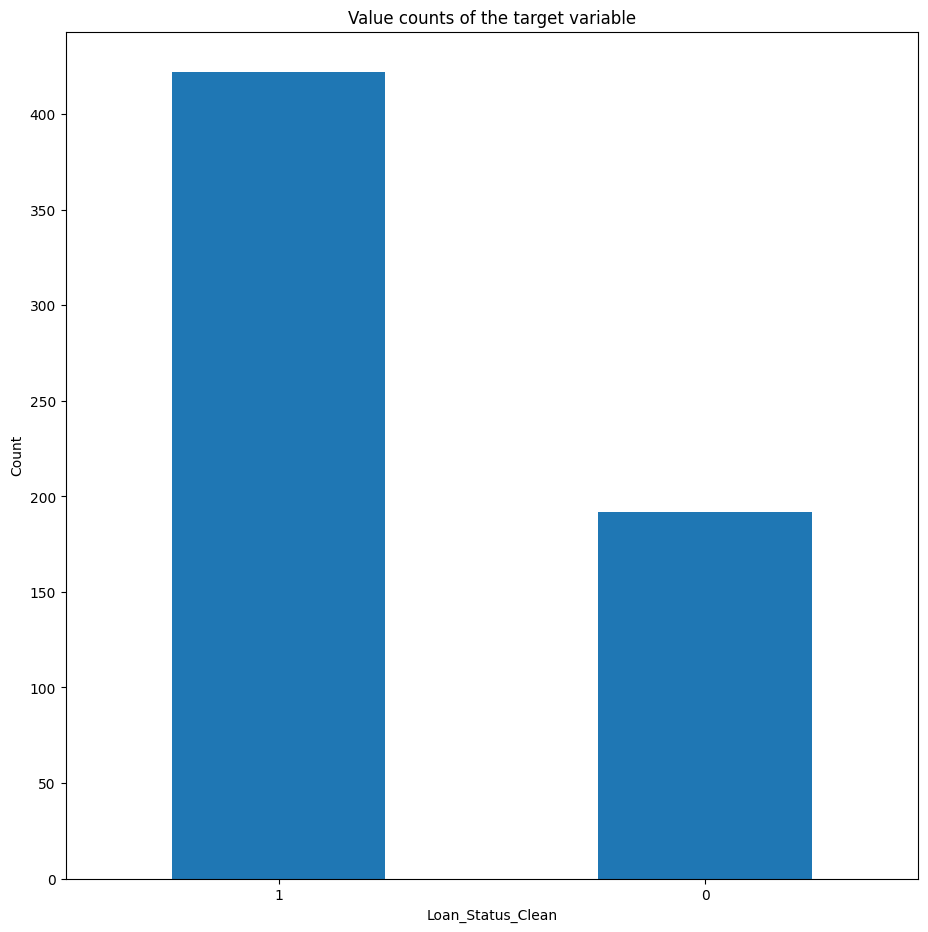

In [321]:
train_data.Loan_Status_Clean.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Loan_Status_Clean")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

#### Convert Categorical into Numerical for Test Data

In [142]:
test_data = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [147]:
test_data.shape

(367, 12)

In [162]:
test_data['Gender_Clean']= label_encoder.fit_transform(test_data['Gender'])
test_data['Married_Clean']= label_encoder.fit_transform(test_data['Married'])
test_data['Dependents_Clean']= label_encoder.fit_transform(test_data['Dependents'])
test_data['Education_Clean']= label_encoder.fit_transform(test_data['Education'])
test_data['Self_Employed_Clean']= label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Property_Area_Clean']= label_encoder.fit_transform(test_data['Property_Area'])
test_data.drop(['Loan_ID'], axis=1, inplace=True)

test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Clean,Married_Clean,Dependents_Clean,Education_Clean,Self_Employed_Clean,Property_Area_Clean
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,0,0,0,2
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,1,0,0,2
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,2,0,0,2
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1,1,2,0,0,2
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,1,1,3,1,1,2
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,1,1,0,0,0,2
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,1,0,0,0,0,1
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,1,1,0,0,0,0


In [163]:
test_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Gender_Clean',
       'Married_Clean', 'Dependents_Clean', 'Education_Clean',
       'Self_Employed_Clean', 'Property_Area_Clean'],
      dtype='object')

In [164]:
test_data = test_data[['Gender_Clean', 'Married_Clean', 'Dependents_Clean', 'Education_Clean', 'Self_Employed_Clean', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                         'Credit_History', 'Property_Area_Clean']]
test_data

,Gender_Clean,Married_Clean,Dependents_Clean,Education_Clean,Self_Employed_Clean,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Clean
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,NaN,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,NaN,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [165]:
test_data.isna().sum()

Gender_Clean            0
Married_Clean           0
Dependents_Clean        0
Education_Clean         0
Self_Employed_Clean     0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              5
Loan_Amount_Term        6
Credit_History         29
Property_Area_Clean     0
dtype: int64

Replacing Missing Values with Mean for Train Data

In [166]:
test_data['LoanAmount'] = test_data['LoanAmount'].replace(np.NaN, test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].replace(np.NaN, test_data['Loan_Amount_Term'].mean())
test_data['Credit_History'] = test_data['Credit_History'].replace(np.NaN, test_data['Credit_History'].mean())

C:\Windows\Temp\ipykernel_1712\1205736184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LoanAmount'] = test_data['LoanAmount'].replace(np.NaN, test_data['LoanAmount'].mean())
C:\Windows\Temp\ipykernel_1712\1205736184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].replace(np.NaN, test_data['Loan_Amount_Term'].mean())
C:\Windows\Temp\ipykernel_1712\1205736184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [169]:
test_data.isna().sum()

Gender_Clean           0
Married_Clean          0
Dependents_Clean       0
Education_Clean        0
Self_Employed_Clean    0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area_Clean    0
dtype: int64

In [172]:
test_data.head()

,Gender_Clean,Married_Clean,Dependents_Clean,Education_Clean,Self_Employed_Clean,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Clean
0,1,1,0,0,0,5720,0,110.0,360.0,1.000000,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.000000,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.000000,2
3,1,1,2,0,0,2340,2546,100.0,360.0,0.825444,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.000000,2


In [319]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender_Clean,185.0,0.810811,0.456704,0.0,1.0,1.0,1.0,2.0
Married_Clean,185.0,0.605405,0.501056,0.0,0.0,1.0,1.0,2.0
Dependents_Clean,185.0,0.756757,1.142209,0.0,0.0,0.0,1.0,4.0
Education_Clean,185.0,0.232432,0.423529,0.0,0.0,0.0,0.0,1.0
Self_Employed_Clean,185.0,0.237838,0.568824,0.0,0.0,0.0,0.0,2.0
ApplicantIncome,185.0,4762.589189,3917.182996,645.0,2764.0,3707.0,5503.0,39147.0
CoapplicantIncome,185.0,1923.367568,3276.114556,0.0,0.0,1560.0,2500.0,33837.0
LoanAmount,185.0,140.413367,64.046140,26.0,102.0,132.0,166.0,480.0
Loan_Amount_Term,185.0,341.254054,66.023919,36.0,360.0,360.0,360.0,480.0
Credit_History,185.0,0.848371,0.346334,0.0,1.0,1.0,1.0,1.0


In [184]:
test_data.shape

(185, 11)

<AxesSubplot: >

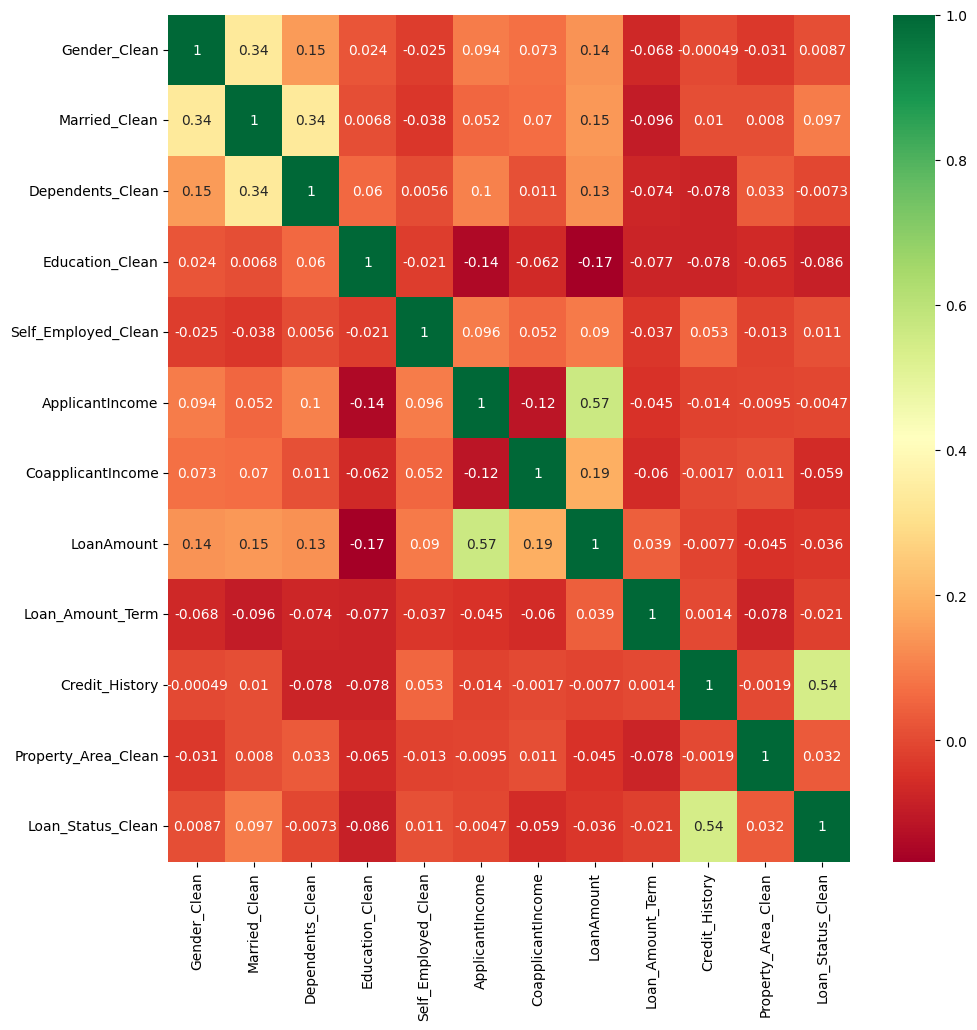

In [317]:
import seaborn as sns


corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [11, 11]
sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [187]:
X = train_data.drop(['Loan_Status_Clean'], axis=1)
y = train_data['Loan_Status_Clean']

X.shape,y.shape

((614, 11), (614,))

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X_train.shape, y_train.shape, X_test.shape,y_test.shape


((429, 11), (429,), (185, 11), (185,))

## Building Models

### Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,dt_pred)))


Accuracy Score : 0.6972972972972973


### KNN

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,knn_pred)))

Accuracy Score : 0.6378378378378379


### Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lg = LogisticRegression(solver='liblinear')
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,lg_pred)))

Accuracy Score : 0.7891891891891892


### Support Vector Machine

In [210]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,svc_pred)))

#C= 1, gamma= 0.01, kernel= 'rbf', random_state=42

Accuracy Score : 0.6702702702702703


### Random Forest

In [304]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,rf_pred)))

Accuracy Score : 0.7837837837837838


## Performing Feature Selection for Best Features

In [221]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler


In [219]:
num_feats = train_data.shape[1]-1
num_feats

11

In [220]:
feature_name = list(X.columns)
feature_name

['Gender_Clean',
 'Married_Clean',
 'Dependents_Clean',
 'Education_Clean',
 'Self_Employed_Clean',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area_Clean']

In [223]:
def chi_squared_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    return chi_support, chi_feature

chi_support, chi_feature = chi_squared_selector(X, y, num_feats)
chi_feature

['Gender_Clean',
 'Married_Clean',
 'Dependents_Clean',
 'Education_Clean',
 'Self_Employed_Clean',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area_Clean']

In [224]:
def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    lr = LogisticRegression(solver='lbfgs')
    rfe_lr = RFE(estimator=lr, n_features_to_select=num_feats, step=1, verbose=5)
    rfe_lr = rfe_lr.fit(X, y)
    rfe_support = rfe_lr.get_support()
    rfe_feature = X.loc[:, rfe_support].columns.tolist()
    # Your code ends here
    return rfe_support, rfe_feature

rfe_lr_support, rfe_lr_feature = rfe_selector(X, y, num_feats)
rfe_lr_feature

C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['Gender_Clean',
 'Married_Clean',
 'Dependents_Clean',
 'Education_Clean',
 'Self_Employed_Clean',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area_Clean']

In [225]:
def embedded_log_reg_selector(X, y, num_feats):
    logreg = LogisticRegression(penalty='l1', solver='liblinear')
    embedded_lr_selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=50000), max_features=num_feats)
    embedded_lr_selector = embedded_lr_selector.fit(X, y)
    embedded_lr_support = embedded_lr_selector.get_support()
    embedded_lr_feature = X.loc[:, embedded_lr_support].columns.tolist()
    return embedded_lr_support, embedded_lr_feature

embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
embedded_lr_feature

['Gender_Clean',
 'Married_Clean',
 'Dependents_Clean',
 'Education_Clean',
 'Self_Employed_Clean',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area_Clean']

In [226]:
def embedded_rf_selector(X, y, num_feats):
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf, 
                           max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X, y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    return embedded_rf_support, embedded_rf_feature

embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
embedded_rf_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

In [227]:
def embedded_lgbm_selector(X, y, num_feats):
    lgbmc = LGBMClassifier(n_estimators=500,
                           learning_rate=0.05,
                           num_leaves=32,
                           colsample_bytree=0.2,
                           reg_alpha=3,
                           reg_lambda=1,
                           min_split_gain=0.01,
                           min_child_weight=40)
    embedded_lgbm_selector = SelectFromModel(lgbmc, 
                                             max_features=num_feats)
    embedded_lgbm_selector = embedded_lgbm_selector.fit(X, y)
    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:, embedded_lgbm_support].columns.tolist()
    
    return embedded_lgbm_support, embedded_lgbm_feature

embedded_lgbm_selector(X, y, num_feats)

(array([False,  True, False, False, False,  True,  True,  True, False,
        False,  True]),
 ['Married_Clean',
  'ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Property_Area_Clean'])

In [228]:
def autoFeatureSelector(dataset_path, methods=[]):
    if 'chi-square' in methods:
        chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
    if 'rfe' in methods:
        rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
    if 'log-reg' in methods:
        embedded_lr_support, embedded_lr_feature = embedded_log_reg_selector(X, y, num_feats)
    if 'rf' in methods:
        embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
    if 'lgbm' in methods:
        embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
    
    
    pd.set_option('display.max_rows', None)

    
    feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embedded_lr_support,
                                    'Random Forest':embedded_rf_support, 'LightGBM':embedded_lgbm_support})

    feature_selection_df['Total'] = feature_selection_df.sum(axis=1)
    feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
    feature_selection_df.index = range(1, len(feature_selection_df)+1)
    feature_selection_df.head(num_feats)

    return feature_selection_df


best_features = autoFeatureSelector(dataset_path="Hotel_Reservations.csv", methods=['chi-square', 'rfe', 'log-reg', 'rf', 'lgbm'])
best_features.head(10)

C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Windows\Temp\ipykernel_1712\2036417185.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_selection_df['Total'] = feature_selection_df.sum(axis=1)


,Feature,Chi-2,RFE,Logistics,Random Forest,LightGBM,Total
1,LoanAmount,True,True,True,True,True,5
2,CoapplicantIncome,True,True,True,True,True,5
3,Property_Area_Clean,True,True,True,False,True,4
4,Married_Clean,True,True,True,False,True,4
5,Credit_History,True,True,True,True,False,4
6,ApplicantIncome,True,True,False,True,True,4
7,Self_Employed_Clean,True,True,True,False,False,3
8,Loan_Amount_Term,True,True,True,False,False,3
9,Gender_Clean,True,True,True,False,False,3
10,Education_Clean,True,True,True,False,False,3


#### Dropping the least important features based on ranking of Feature Selector

In [229]:
X = train_data.drop(['Loan_Status_Clean', 'Education_Clean'], axis=1)
y = train_data['Loan_Status_Clean']

#### Spliting DataSet into train and test

In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

X_train.shape, y_train.shape, X_test.shape,y_test.shape

((429, 10), (429,), (185, 10), (185,))

## Choose the best model with the best hyperparameter

### Decision Tree with Grid Search

In [263]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [260]:
dt_grid_param = {"criterion":["gini","entropy"], "max_depth" :[1,2,3,4,5,6,None]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid = dt_grid_param, verbose=1, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)



Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None]},
             verbose=1)

In [261]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [265]:
dt_gridsearch = DecisionTreeClassifier(criterion="gini", max_depth= 1)
dt_gridsearch.fit(X_train,y_train)
dt_gridpred = dt_gridsearch.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,rf_pred)))
print(confusion_matrix(y_test, dt_gridpred))


Accuracy Score : 0.7891891891891892
[[ 24  37]
 [  2 122]]


##### GridSearchCV increases the Accuracy Score for the Decision Tree Model by 78.91% whereas Base model gives the Accuracy 69.72%

### KNN with Grid Search

In [254]:
knn_grid_params = {'n_neighbors' : [5,7,9,11,13,15],
                   'weights' : ['uniform','distance'],
                   'metric' : ['minkowski','euclidean','manhattan']}

In [255]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_grid_params, verbose = 1, cv=3, n_jobs = -1)
knn_grid.fit(X_train,y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [256]:
knn_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [266]:
knn_gridsearch = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn_gridsearch.fit(X_train, y_train)
knn_gridpred = knn_gridsearch.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,knn_gridpred)))
print(confusion_matrix(y_test, knn_gridpred))


Accuracy Score : 0.6432432432432432
[[  2  59]
 [  7 117]]


##### GridSearchCV on KNN gave minor change in the Accuracy Score for the Model with 64.32% whereas Base model gives the Accuracy 63.78%

### Logistic Regression with Grid Search

In [267]:
lg_grid_param = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}


In [313]:
lg_grid = GridSearchCV(LogisticRegression(), param_grid = lg_grid_param, scoring = 'recall', verbose = 1, cv=3, n_jobs = -1)
lg_grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\k

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [314]:
lg_grid.best_params_

{'C': 0.009, 'penalty': 'l2'}

In [315]:
lg_gridsearch = LogisticRegression(solver='liblinear', C=0.009, penalty='l2')
lg_gridsearch.fit(X_train, y_train)
lg_gridpred = lg_gridsearch.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,lg_gridpred)))
print(confusion_matrix(y_test, lg_gridpred))


Accuracy Score : 0.6756756756756757
[[  1  60]
 [  0 124]]


##### GridSearchCV on Logistic Regression gives a significant drop in the Accuracy Score for the Model with 67.56% whereas Base model gives the Accuracy 78.91%

### Support Vector Machine with Grid Search

In [281]:
svc_grid_param = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']} 

In [284]:
svc_grid = GridSearchCV(SVC(), param_grid = svc_grid_param, refit = True, verbose = 1, cv=3, n_jobs = -1)
svc_grid.fit(X_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [285]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [286]:
svc_gridsearch = SVC(C=1, gamma=0.001, kernel='rbf', random_state=None)
svc_gridsearch.fit(X_train, y_train)
svc_gridpred = svc_gridsearch.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,svc_gridpred)))
print(confusion_matrix(y_test, svc_gridpred))

Accuracy Score : 0.6864864864864865
[[  4  57]
 [  1 123]]


##### GridSearchCV on SVC gives a small increase in the Accuracy Score for the Model with 68.64% whereas Base model gives the Accuracy of 67.02%

### Random Forest with Grid Search

In [287]:
rf_grid_param = {'n_estimators': [20,60,100],
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': [60, 90, 110],
                 'min_samples_leaf': [2, 3, 4],
                 'min_samples_split': [8, 10],
                 'criterion': ['gini', 'entropy'],
                 }

In [299]:
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid = rf_grid_param, refit = True, verbose = 1, cv=3, n_jobs = -1, scoring= 'recall')
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [60, 90, 110],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [20, 60, 100]},
             scoring='recall', verbose=1)

In [300]:
rf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [303]:
rf_gridsearch = RandomForestClassifier(criterion='gini', max_depth=60, max_features='auto', min_samples_leaf=2, min_samples_split=10, n_estimators=100)
rf_gridsearch.fit(X_train, y_train)
rf_gridpred = rf_gridsearch.predict(X_test)
print('Accuracy Score : ' + str(accuracy_score(y_test,rf_gridpred)))
print(confusion_matrix(y_test, rf_gridpred))

C:\Users\ks010\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy Score : 0.7891891891891892
[[ 26  35]
 [  4 120]]


##### GridSearchCV on Random Forest gave a negligant change in the Accuracy Score for the Model with 78.91% whereas Base model gives the Accuracy 78.37%

# Best Algorithm Accuracy

In [323]:
print('Decision Tree Accuracy : ' + str(accuracy_score(y_test,dt_pred)))
print('KNN Accuracy : ' + str(accuracy_score(y_test,knn_pred)))
print('Logistic Regression Accuracy : ' + str(accuracy_score(y_test,lg_pred)))
print('SVC Accuracy : ' + str(accuracy_score(y_test,svc_pred)))
print('Random Forest Accuracy : ' + str(accuracy_score(y_test,rf_pred)))

Decision Tree Accuracy : 0.6972972972972973
KNN Accuracy : 0.6378378378378379
Logistic Regression Accuracy : 0.7891891891891892
SVC Accuracy : 0.6702702702702703
Random Forest Accuracy : 0.7837837837837838


# Best Hyperparameter Accuracy for every Algorithm


In [324]:
print('Hyperparameter Decision Tree Accuracy : ' + str(accuracy_score(y_test,dt_gridpred)))
print('Hyperparameter KNN Accuracy : ' + str(accuracy_score(y_test,knn_gridpred)))
print('Hyperparameter Logistic Regression Accuracy : ' + str(accuracy_score(y_test,lg_gridpred)))
print('Hyperparameter SVC Accuracy : ' + str(accuracy_score(y_test,svc_gridpred)))
print('Hyperparameter Random Forest Accuracy : ' + str(accuracy_score(y_test,rf_gridpred)))

Hyperparameter Decision Tree Accuracy : 0.7891891891891892
Hyperparameter KNN Accuracy : 0.6432432432432432
Hyperparameter Logistic Regression Accuracy : 0.6756756756756757
Hyperparameter SVC Accuracy : 0.6864864864864865
Hyperparameter Random Forest Accuracy : 0.7891891891891892


#### Random Forest & Decision Tree gives similar Accuracy Score after performing Grid Search on the models.